## Introduction
The dataset has been scraped from the energy reports of POSOCO.Power System Operation Corporation Limited (POSOCO) is a wholly-owned Government of India enterprise under the Ministry of Power. It was earlier a wholly-owned subsidiary of Power Grid Corporation of India Limited. It was formed in March 2009 to handle the power management functions of PGCIL.
Data is in the form of a time series for a period of 17 months beginning from 2nd Jan 2019 till 23rd May 2020.
Rows are indexed with dates and columns represent states.
Rows and columns put together, each datapoint reflects the power consumed in Mega Units (MU) by the given state (column) at the given date (row).
In light of the recent COVID-19 situation, when everyone has been under lockdown for the months of April & May the impacts of the lockdown on economic activities have been faced by every sector in a positive or a negative way.
With the electricity consumption being so crucial to the country, we came up with a plan to study the impact on energy consumption state and region wise.

The dataset is exhaustive in its demonstration of energy consumption state wise.




In [ ]:
!pip install bar_chart_race

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML
import calendar
from plotly.subplots import make_subplots
import bar_chart_race as bcr
from plotly.offline import iplot
import seaborn as sns

####Loading Dataset

In [ ]:
df = pd.read_csv('/content/dataset_tk.csv')
df_long = pd.read_csv('/content/long_data_.csv')

#### column names

In [ ]:
print(df.columns)
print(df_long.columns)

Index(['Date', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand',
       'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'MP',
       'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana', 'Karnataka',
       'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand', 'Odisha',
       'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura', 'NR', 'WR', 'SR', 'ER',
       'NER', 'Total'],
      dtype='object')
Index(['States', 'Regions', 'latitude', 'longitude', 'Dates', 'Usage'], dtype='object')


#### rename column

In [ ]:
#first column is Date which is named as Unnamed, renaming it.
df.rename(columns={'Unnamed: 0':'Date'},inplace=True)

####checking info of the dataset

In [ ]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               503 non-null    object 
 1   Punjab             503 non-null    float64
 2   Haryana            503 non-null    float64
 3   Rajasthan          503 non-null    float64
 4   Delhi              503 non-null    float64
 5   UP                 503 non-null    float64
 6   Uttarakhand        503 non-null    float64
 7   HP                 503 non-null    float64
 8   J&K                503 non-null    float64
 9   Chandigarh         503 non-null    float64
 10  Chhattisgarh       503 non-null    float64
 11  Gujarat            503 non-null    float64
 12  MP                 503 non-null    float64
 13  Maharashtra        503 non-null    float64
 14  Goa                503 non-null    float64
 15  DNH                503 non-null    float64
 16  Andhra Pradesh     503 non

In [ ]:
#checking info
df_long.info

<bound method DataFrame.info of           States Regions   latitude  longitude                Dates  Usage
0         Punjab      NR  31.519974  75.980003  02/01/2019 00:00:00  119.9
1        Haryana      NR  28.450006  77.019991  02/01/2019 00:00:00  130.3
2      Rajasthan      NR  26.449999  74.639981  02/01/2019 00:00:00  234.1
3          Delhi      NR  28.669993  77.230004  02/01/2019 00:00:00   85.8
4             UP      NR  27.599981  78.050006  02/01/2019 00:00:00  313.9
...          ...     ...        ...        ...                  ...    ...
16594    Manipur     NER  24.799971  93.950017  05/12/2020 00:00:00    2.5
16595  Meghalaya     NER  25.570492  91.880014  05/12/2020 00:00:00    5.8
16596    Mizoram     NER  23.710399  92.720015  05/12/2020 00:00:00    1.6
16597   Nagaland     NER  25.666998  94.116570  05/12/2020 00:00:00    2.1
16598    Tripura     NER  23.835404  91.279999  05/12/2020 00:00:00    3.3

[16599 rows x 6 columns]>

####change data type of column Date

In [ ]:
# Date column type is object, chnaging its type to datetime.
df['Date'] = pd.to_datetime(df.Date, dayfirst=True)
df_long['Dates'] = pd.to_datetime(df_long.Dates, dayfirst=True)

#### Region Wise Daily Power Consumption

In [ ]:
df['NR'] = df['Punjab']+ df['Haryana']+ df['Rajasthan']+ df['Delhi']+df['UP']+df['Uttarakhand']+df['HP']+df['J&K']+df['Chandigarh']

df['WR'] = df['Chhattisgarh']+df['Gujarat']+df['MP']+df['Maharashtra']+df['Goa']+df['DNH']

df['SR'] = df['Andhra Pradesh']+df['Telangana']+df['Karnataka']+df['Kerala']+df['Tamil Nadu']+df['Pondy']

df['ER'] = df['Bihar']+df['Jharkhand']+ df['Odisha']+df['West Bengal']+df['Sikkim']

df['NER'] =df['Arunachal Pradesh']+df['Assam']+df['Manipur']+df['Meghalaya']+df['Mizoram']+df['Nagaland']+df['Tripura']

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.Date, y=df.NR,
    mode='lines+markers',
    name='Northern region',
    marker=dict(
            color='rgba(300, 50, 50, 0.8)',
            size=5,
            line=dict(
                color='DarkSlateGrey',
                width = 1
                     )
                )
))

fig.add_trace(go.Scatter(
    x=df.Date, y=df.SR,
    mode='lines+markers',
    name='Southern Region',
    marker=dict(
            color='rgba(50, 300, 50, 0.8)',
            size=5,
            line=dict(
                color='DarkSlateGrey',
                width = 1
                     )
                )
))

fig.add_trace(go.Scatter(
    x=df.Date, y=df.ER,
    mode='lines+markers',
    name='Eastern Region',
    marker=dict(
            color='rgba(50, 50, 300, 0.8)',
            size=5,
            line=dict(
                color='DarkSlateGrey',
                width = 1
                     )
                )
))

fig.add_trace(go.Scatter(
    x=df.Date, y=df.WR,
    mode='lines+markers',
    name='Western Region',
    marker=dict(
            color='rgba(300, 100, 200, 0.8)',
            size=5,
            line=dict(
                color='DarkSlateGrey',
                width = 1
                     )
                )
))

fig.add_trace(go.Scatter(
    x=df.Date, y=df.NER,
    mode='lines+markers',
    name='North-Eastern',
    marker=dict(
            color='rgba(100, 200, 300, 0.8)',
            size=5,
            line=dict(
                color='DarkSlateGrey',
                width = 1
                     )
                )
))


fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(title='Power Consumption in Various Region')
fig.update_layout(width=800,height=500)
fig.show()

#### Monthly average Power Consumption

In [ ]:
monthly_df = df_long.groupby([df_long.Dates.dt.year, df_long.Dates.dt.month,df_long.States,df_long.Regions, df_long.latitude,df_long.longitude])['Usage'].mean()
monthly_df.index = monthly_df.index.set_names(['year', 'month','State','Region','latitude','longitude'])
monthly_df = monthly_df.reset_index()
monthly_df['month'] = monthly_df['month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
monthly_df.head()

,year,month,State,Region,latitude,longitude,Usage
0,2019,Jan,Andhra Pradesh,SR,14.750429,78.570026,168.520000
1,2019,Jan,Arunachal Pradesh,NER,27.100399,93.616601,2.160000
2,2019,Jan,Assam,NER,26.749981,94.216667,25.616667
3,2019,Jan,Bihar,ER,25.785414,87.479973,87.733333
4,2019,Jan,Chandigarh,NR,30.719997,76.780006,4.376667


In [ ]:
# Bar chart of state wise electricity consumption
fig=go.Figure(go.Pie(labels=monthly_df['State'], 
                     values=monthly_df['Usage'], title='State Wise Electricity Consumption'))
iplot(fig)

#### Inference: Maharashtra has maximum power consumption compared to other states.

#### drop null values

In [ ]:
df.dropna(inplace=True)

#### creating df `Total` where `Total Usage` of electricity is added.

In [ ]:
# data cleaning 
df1['Total']=df1.sum(axis=1)
df1.loc['Total']=df1.sum()
Total_comsumes=df1.iloc[[-1]]
Total=Total_comsumes.transpose()
Total.drop(Total.index[[-1]], inplace=True)
Total.reset_index(inplace=True)
Total.rename(columns={'index':'State'}, inplace=True)

#### change type of column `Totall` to int.

In [ ]:
Total.Total = Total.Total.astype(int)

#### Top 10 Electricity consumption state 

In [ ]:
# Top 10 Electricity consumption state 
Top_10_EC_Consume=Total.nlargest(10, 'Total')
Top_10_EC_Consume

Date,State,Total
12,Maharashtra,434159
10,Gujarat,324977
4,UP,315920
19,Tamil Nadu,302543
2,Rajasthan,219753
11,MP,209532
17,Karnataka,205331
16,Telangana,188130
15,Andhra Pradesh,177208
0,Punjab,141992


In [ ]:
layout = go.Layout(title = "Maximum power consume state", xaxis = {'title':'EC'}, yaxis = {'title':'State'})
cons=go.Bar(x=Top_10_EC_Consume['Total'], y=Top_10_EC_Consume['State'], orientation='h' )
fig=go.Figure(data=cons, layout=layout)
iplot(fig)
print(Top_10_EC_Consume)

Date           State   Total
12       Maharashtra  434159
10           Gujarat  324977
4                 UP  315920
19        Tamil Nadu  302543
2          Rajasthan  219753
11                MP  209532
17         Karnataka  205331
16         Telangana  188130
15    Andhra Pradesh  177208
0             Punjab  141992


#### Inference: Maharashtra has maximum power consumption.

#### Minimum Power Consumption state

In [ ]:
# Minimum Power Consumption state
Low_EC_Consumption=Total.nsmallest(10, 'Total')

In [ ]:
layout = go.Layout(title = "Minimum power consume state", xaxis = {'title':'EC'}, yaxis = {'title':'State'})
d=go.Bar(x=Low_EC_Consumption['Total'],y=Low_EC_Consumption['State'], orientation='h')
fig=go.Figure(data=d, layout=layout)
iplot(fig)

#### Inference: Sikkim has minimum power consumption.

#### Region wise bar plot

In [ ]:
fig = px.bar(monthly_df, x="Region", y="Usage",color='State',animation_frame = 'month')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(title='Region-wise Bar plots')
fig.show()

#### Before and After lockdown Scenarios

In [ ]:
df_before = df.iloc[0:150,:]
df_after = df.iloc[151:,]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter( x=df_before['Date'], y=df_before['Gujarat'], name='Gujarat before lockdown',fill='tonexty',
    line=dict(width=2,dash='dot',color='firebrick') 
))
fig.add_trace(go.Scatter( x=df_before['Date'], y=df_before['Maharashtra'], name='Maharashtra before lockdown',fill='tonexty',
    line=dict(width=2,dash='dot',color='coral')
))

fig.add_trace(go.Scatter( x=df_before['Date'], y=df_before['MP'], name='MP before lockdown',fill='tozeroy',
    line=dict(width=2,dash='dot',color='darkred')
))

fig.add_trace(go.Scatter(x=df_after['Date'], y=df_after['Gujarat'],name='Gujarat after lockdown',fill='tozeroy',
    line=dict(color='firebrick', width=2)
))

fig.add_trace(go.Scatter(x=df_after['Date'], y=df_after['Maharashtra'],name='Maharashtra after lockdown',fill='tozeroy',
    line=dict(color='coral', width=2)
))

fig.add_trace(go.Scatter(x=df_after['Date'], y=df_after['MP'],name='MP after lockdown',fill='tozeroy',
    line=dict(color='darkred', width=2)
))

fig.update_layout(title='Power Consumption in top 3 WR states')
fig.update_layout( width=800,height=500)
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter( x=df_before['Date'], y=df_before['Karnataka'], name='Karnataka before lockdown',fill='tonexty',
    line=dict(width=2,dash='dot',color='skyblue') 
))
fig.add_trace(go.Scatter( x=df_before['Date'], y=df_before['Tamil Nadu'], name='Tamil Nadu before lockdown',fill='tonexty',
    line=dict(width=2,dash='dot',color='lightblue')
))

fig.add_trace(go.Scatter( x=df_before['Date'], y=df_before['Telangana'], name='Telangana before lockdown',fill='tozeroy',
    line=dict(width=2,dash='dot',color='midnightblue')
))

fig.add_trace(go.Scatter(x=df_after['Date'], y=df_after['Karnataka'],name='Karnataka after lockdown',fill='tozeroy',
    line=dict(color='skyblue', width=2)
))

fig.add_trace(go.Scatter(x=df_after['Date'], y=df_after['Tamil Nadu'],name='Tamil Nadu after lockdown',fill='tozeroy',
    line=dict(color='lightblue', width=2)
))

fig.add_trace(go.Scatter(x=df_after['Date'], y=df_after['Telangana'],name='Telangana after lockdown',fill='tozeroy',
    line=dict(color='midnightblue', width=2)
))

fig.update_layout(title='Power Consumption in top 3 WR states')
fig.update_layout( width=800,height=500)
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter( x=df_before['Date'], y=df_before['Rajasthan'], name='Rajasthan before lockdown',fill='tonexty',
    line=dict(width=2,dash='dot',color='darkviolet') 
))

fig.add_trace(go.Scatter( x=df_before['Date'], y=df_before['UP'], name='UP before lockdown',fill='tonexty',
    line=dict(width=2,dash='dot',color='deeppink')
))


fig.add_trace(go.Scatter( x=df_before['Date'], y=df_before['Haryana'], name='Haryana before lockdown',fill='tozeroy',
    line=dict(width=2,dash='dot',color='indigo')
))

fig.add_trace(go.Scatter(x=df_after['Date'], y=df_after['Rajasthan'],name='Rajasthan after lockdown',fill='tozeroy',
    line=dict(color='darkviolet', width=2)
))

fig.add_trace(go.Scatter(x=df_after['Date'], y=df_after['UP'],name='UP after lockdown',fill='tonexty',
    line=dict(color='deeppink', width=2)
))


fig.add_trace(go.Scatter(x=df_after['Date'], y=df_after['Haryana'],name='Haryana after lockdown',fill='tozeroy',
    line=dict(color='indigo', width=2)
))

fig.update_layout(title='Power Consumption in top 3 NR states')
fig.update_layout( width=800,height=500)
fig.show()

#### Maximum value reached in each Region

In [ ]:
WR_df = df_long[df_long['Regions']=='WR']
NR_df = df_long[df_long['Regions']=='NR']
SR_df = df_long[df_long['Regions']=='SR']
ER_df = df_long[df_long['Regions']=='ER']
NER_df = df_long[df_long['Regions']=='NER']

In [ ]:
    
fig= go.Figure(go.Indicator(
    mode = "gauge+number",
    value = WR_df['Usage'].max(),
    title = {'text': "Max Power Usage In WR:Maharashtra 13/05/2020"},
    gauge = {
        'axis': {'range': [None, 500], 'tickwidth': 1},
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 490}}
))

fig.show()

In [ ]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = NR_df['Usage'].max(),
    title = {'text': "Max Power Usage In NR :UP 09/05/2020"},
    gauge = {
        'axis': {'range': [None, 500], 'tickwidth': 1},
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 490}}
))

fig.show()

In [ ]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = SR_df['Usage'].max(),
    title = {'text': "Max Power Usage In SR : Tamil Nadu  01/11/2019"},
    gauge = {
        'axis': {'range': [None, 500], 'tickwidth': 1},
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 490}}
))

fig.show()

In [ ]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = ER_df['Usage'].max(),
    title = {'text': "Max Power Usage In ER: West Bangal 04/05/2020"},
    gauge = {
        'axis': {'range': [None, 500], 'tickwidth': 1},
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 490}}
))

fig.show()

In [ ]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = NER_df['Usage'].max(),
    title = {'text': "Max Power Usage In NER: Assam 05/05/2020"},
    gauge = {
        'axis': {'range': [None, 500], 'tickwidth': 1},
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 490}}
))

fig.show()

#### Dropping null values in df_long

In [ ]:
#dropping null values
df_long.dropna(inplace = True)

In [ ]:
#print data
df_long.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8
4,UP,NR,27.599981,78.050006,2019-01-02,313.9


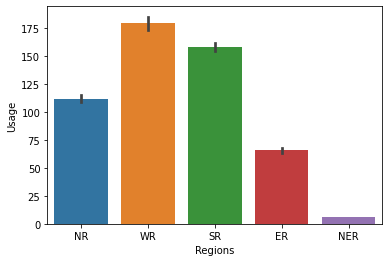

In [ ]:
#barplot showing electric usage region wise
sns.barplot(data=df_long,x='Regions',y='Usage')

In [ ]:
##barplot showing electric usage region wise
fig = px.bar(df_long, x='Regions', y='Usage', color='Usage')
fig.show()

#### Inference: Maximum usage of electricity is in West Region. 





#### plot electric consumption on map

In [ ]:
# plot electric consumption on map region wise
fig = px.scatter_geo(df_long,'latitude','longitude', color="Regions",
                     hover_name="States", size="Usage", scope='asia')
fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100])
fig.show()

Power is one of the most critical components of infrastructure crucial for the economic growth and welfare of nations. The existence and development of adequate infrastructure is essential for sustained growth of the Indian economy. India is the world's third largest producer and third largest consumer of electricity. Sustained economic growth continues to drive electricity demand in India.
Consumption of electricity is known to follow economic activity closely. The industries that produce essential goods are operating at very low utilization levels. Hence, in such a scenario one expects electricity demands to go down.
This notebook gives a brief intro of the electrical dataset, through interactive visualizations which will allow to browse through data visually. The intension is to build an intuition about the data thereby being able to answer questions of relevance. The date ranges `from 28/10/2019 to 23/05/2020`.

